In [1]:
import sncosmo

In [2]:
SNIa = sncosmo.Model(source='salt2-extended')
SNIbc = sncosmo.Model(source='nugent-sn1bc')

In [3]:
# Put them at z = 0.3

In [4]:
SNIa.set(z=0.3)
SNIbc.set(z=0.3)

In [5]:
# Normally one expects core collapse to be a little dimmer than 
SNIa.set_source_peakabsmag(-19.3, 'BessellB', 'ab')
SNIbc.set_source_peakabsmag(-19.3, 'BessellB', 'ab')

In [14]:
import pandas as pd

In [18]:
import numpy as np

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()

In [8]:
# In this hack, we will be a little lazy and careless in our translation of 5 sigma depths to 

In [19]:
medianSVD  = pd.Series(np.array([ 23.9,  25. ,  24.7,  24. ,  23.3,  22.1]), index=['u', 'g', 'r', 'i','z', 'y'])

In [25]:
skyNoiseCont = 10.0 ** (-0.4 * medianSVD) / 5.0

In [9]:
# Get LSST Filters
# Clone the repository https://github.com/lsst/throughputs
# SET the environment variable THROUGHPUTS_DIR to the absolute path for throughputs ie. THROUGHPUTS_DIR should contain baseline

In [20]:
from __future__ import absolute_import

In [21]:
import filters #Will not work if the env variable THROUGHPUTS_DIR is not set
# Now we have bandpasses in the registry like below

In [31]:
sncosmo.get_bandpass('lsst_u')

<Bandpass 'LSST_u' at 0x10ecb5190>

In [40]:
peak = SNIbc.source.peakphase('lsst_g', sampling=0.1)
redshift = SNIbc.get('z')
SNIbc.set(t0=-peak * (1+redshift))

<Container object of 3 artists>

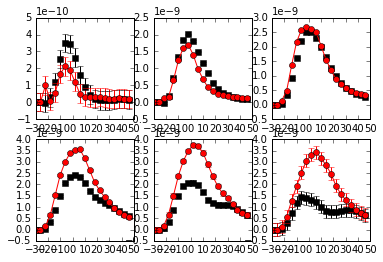

In [54]:
fig, ax = plt.subplots(2, 3)
times = np.arange(-30, 50., 4.)
ax[0,0].errorbar(times, SNIa.bandflux('LSST_u', times, zp=0., zpsys='ab'), yerr=np.ones(len(times))*skyNoiseCont.ix['u'], fmt='ks')
ax[0, 0].errorbar(times, SNIbc.bandflux('LSST_u', times, zp=0., zpsys='ab'), yerr=np.ones(len(times))*skyNoiseCont.ix['u'], fmt='r-o')
ax[0, 1].errorbar(times, SNIa.bandflux('LSST_g', times, zp=0., zpsys='ab'), yerr=np.ones(len(times))*skyNoiseCont.ix['g'], fmt='ks')
ax[0, 1].errorbar(times, SNIbc.bandflux('LSST_g', times, zp=0., zpsys='ab'), yerr=np.ones(len(times))*skyNoiseCont.ix['g'], fmt='r-o')
ax[0, 2].errorbar(times, SNIa.bandflux('LSST_r', times, zp=0., zpsys='ab'), yerr=np.ones(len(times))*skyNoiseCont.ix['r'], fmt='ks')
ax[0, 2].errorbar(times, SNIbc.bandflux('LSST_r', times, zp=0., zpsys='ab'), yerr=np.ones(len(times))*skyNoiseCont.ix['r'], fmt='r-o')
ax[1, 0].errorbar(times, SNIa.bandflux('LSST_i', times, zp=0., zpsys='ab'), yerr=np.ones(len(times))*skyNoiseCont.ix['i'], fmt='ks')
ax[1, 0].errorbar(times, SNIbc.bandflux('LSST_i', times, zp=0., zpsys='ab'), yerr=np.ones(len(times))*skyNoiseCont.ix['i'], fmt='r-o')
ax[1, 1].errorbar(times, SNIa.bandflux('LSST_z', times, zp=0., zpsys='ab'), yerr=np.ones(len(times))*skyNoiseCont.ix['z'], fmt='ks')
ax[1, 1].errorbar(times, SNIbc.bandflux('LSST_z', times, zp=0., zpsys='ab'), yerr=np.ones(len(times))*skyNoiseCont.ix['z'], fmt='r-o')
ax[1, 2].errorbar(times, SNIa.bandflux('LSST_y', times, zp=0., zpsys='ab'), yerr=np.ones(len(times))*skyNoiseCont.ix['y'], fmt='ks')
ax[1, 2].errorbar(times, SNIbc.bandflux('LSST_y', times, zp=0., zpsys='ab'), yerr=np.ones(len(times))*skyNoiseCont.ix['y'], fmt='r-o')

In [47]:
np.ones(len(times))*skyNoiseCont.ix['g']

array([  2.00000000e-11,   2.00000000e-11,   2.00000000e-11,
         2.00000000e-11,   2.00000000e-11,   2.00000000e-11,
         2.00000000e-11,   2.00000000e-11,   2.00000000e-11,
         2.00000000e-11,   2.00000000e-11,   2.00000000e-11,
         2.00000000e-11,   2.00000000e-11,   2.00000000e-11,
         2.00000000e-11,   2.00000000e-11,   2.00000000e-11,
         2.00000000e-11,   2.00000000e-11])